# Analiza podatkov s knjiznjico Pandas

## Predpriprava

In [86]:
# naložim pakete
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# naložim razpredelnico csv
prenosniki = pd.read_csv('urejeni_podatki.csv', index_col='kljuc')

## Izpis podatkov

Podatke izpišem tako, da so najdražji prenosniki na začetku.

In [87]:
prenosniki.sort_values(['Cena'], ascending=[False]).head(10)

Ime Znamka    Cena  \
kljuc                                                                     
37     Asus prenosnik ROG Strix GL703GM-EE014 i7-8750...   Asus  1649.0   
32     Apple prenosnik MacBook Pro 13 Retina/DC i5-2 ...  Apple  1609.0   
41     Asus prenosnik UX461FN-E1027R i7-8565U/8GB/SSD...   Asus  1399.0   
30     Acer prenosnik Swift 5 SF514-52TP-815K i7-8550...   Acer  1359.0   
12     Acer gaming prenosnik Nitro 5 AN515-52-788M i7...   Acer  1322.7   
13     Acer gaming prenosnik Nitro 5 AN515-52-788M i7...   Acer  1322.7   
14     Acer gaming prenosnik Predator PH317-52-73PL i...   Acer  1236.4   
40     Asus prenosnik UX461FN-E1026T i7-8565U/8GB/SSD...   Asus  1218.8   
23     Acer prenosnik Aspire 7 A717-72G-75ZL i7-8750H...   Acer  1178.4   
28     Acer prenosnik Swift 5 SF514-52TP-55ZG i5-8250...   Acer  1082.0   

       Velikost zaslona Operacijski sistem  Kapaciteta trdega diska  \
kljuc                                                                 
37                 17.3           Free DOS                     1000   
32                 13.3           Mac OS X                      128   
41                 14.0     Windows 10 Pro                      512   
30                 14.0     Windows 10 Pro                      512   
12                 15.6    Windows 10 Home                     1000   
13                 15.6    Windows 10 Home                     1000   
14                 17.3              Linux                     1000   
40                 14.0    Windows 10 Home                      256   
23                 17.3    Windows 10 Home                      512   
28                 14.0     Windows 10 Pro                      256   

       Spomin (RAM)       Procesor  Locljivost zaslona  \
kljuc                                                    
37               16  Intel Core i7             2073600   
32                8  Intel Core i5             4096000   
41                8  Intel Core i7             2073600   
30               16  Intel Core i7             2073600   
12                8  Intel Core i7             2073600   
13                8  Intel Core i7             2073600   
14               16  Intel Core i7             2073600   
40                8  Intel Core i7             2073600   
23                8  Intel Core i7             2073600   
28                8  Intel Core i5             2073600   

      Vrsta spominskega medija  Frekvenca  Stevilo jeder procesorja  
kljuc                                                                
37                   HDD + SSD       2200                         6  
32                         SSD       2300                         2  
41                         SSD       1800                         4  
30                         SSD       1800                         4  
12                   HDD + SSD       2200                         6  
13                   HDD + SSD       2200                         6  
14                   HDD + SSD       2200                         6  
40                         SSD       1800                         4  
23                         SSD       2200                         6  
28                         SSD       1600                         4

## Urejanje podatkov

uredim podatke, ki jih bom potrebovala pri analizi prenosnikov in risanju grafov.

### Nov stolpec

Dodam stolpec 'Število operacij', ki je zmnožek med frekvenco in številom jeder procesorja. Ta stolpec nam pove koliko operacij opravi računalnik na sekundo.

In [88]:
prvi_stolpec = []
for i in prenosniki['Frekvenca']:
    if i == 'np.nan':
        prvi_stolpec.append(np.nan)
    else:
        prvi_stolpec.append(int(i))

drugi_stolpec = []
for i in prenosniki['Stevilo jeder procesorja']:
    if i == 'np.nan':
        drugi_stolpec.append(np.nan)
    else:
        drugi_stolpec.append(int(i))

stolpec = [a*b for a,b in zip(prvi_stolpec,drugi_stolpec)]


prenosniki['Stevilo operacij'] = stolpec

### Zdruzevanje

In [89]:
prenosniki_po_znamki = prenosniki.groupby('Znamka')

In [90]:
prenosniki_po_procesorju = prenosniki.groupby('Procesor')

In [91]:
prenosniki_po_velikosti_zaslona = prenosniki.groupby('Velikost zaslona')

In [92]:
prenosniki_po_locljivosti_zaslona = prenosniki.groupby('Locljivost zaslona')

In [93]:
prenosniki_po_stevilu_operacij = prenosniki.groupby('Stevilo operacij')

In [94]:
prenosniki_po_spominu = prenosniki.groupby('Spomin (RAM)')

In [95]:
prenosniki_po_spominskem_mediju = prenosniki.groupby('Vrsta spominskega medija')

### Operacije

In [96]:
prenosniki['Log2 KTD'] = np.log2(prenosniki['Kapaciteta trdega diska']).round()

prenosniki_po_log2_KTD = prenosniki.groupby('Log2 KTD')

In [97]:
stolpec = [a/b for a,b in zip(prenosniki['Cena'],prenosniki['Log2 KTD'])]

prenosniki['Cena normirana z log2 KTD'] = stolpec

prenosniki['Cena normirana z log2 KTD'] = prenosniki['Cena normirana z log2 KTD'].round()

prenosniki_po_cena_norm_z_log2_KTD = prenosniki.groupby('Cena normirana z log2 KTD')

# Analiza prenosnikov in risanje grafov

In [98]:
%matplotlib inline

## Analiza specifikacij prenosnikov

### Analiza kapacitete RAM-a in števila operacij

Text(0,0.5,'povprečna cena')

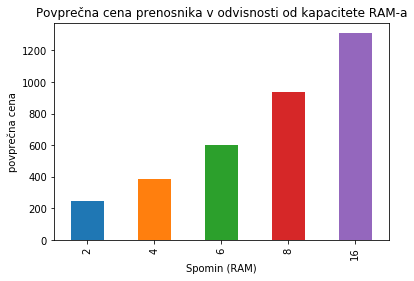

In [99]:
prenosniki_po_spominu['Cena'].mean().plot.bar(title = 'Povprečna cena prenosnika v odvisnosti od kapacitete RAM-a')
plt.ylabel('povprečna cena')

Na zgornjem histogramu je prikazana povprečna cena prenosnika v odvisnosti od kapacitete RAM-a v enoti GB. <br> Opazimo, da cena očitno narašča skupaj z kapaciteto RAM.

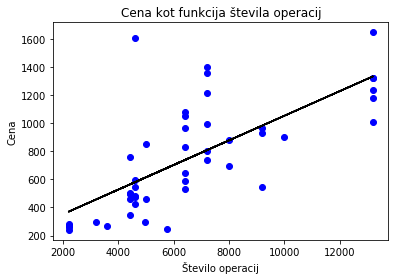

In [100]:
x = prenosniki['Stevilo operacij']
y = prenosniki['Cena']

idx = np.isfinite(x) & np.isfinite(y)
ab = np.polyfit(x[idx], y[idx], 1)


fit_fn = np.poly1d(ab) 

plt.title('Cena kot funkcija števila operacij')
plt.xlabel('Število operacij')
plt.ylabel('Cena')
plt.plot(x,y, 'bo', x, fit_fn(x), '--k')

Na zgornjem histogramu je prikazana povprečna cena prenosnika v odvisnosti od števila operacij na sekundo. <br> Opazimo, da cena očitno narašča skupaj s številom operacij.

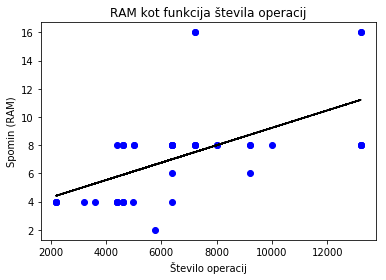

In [101]:
prenosniki.plot.scatter('Stevilo operacij', 'Spomin (RAM)')

x = prenosniki['Stevilo operacij']
y = prenosniki['Spomin (RAM)']

idx = np.isfinite(x) & np.isfinite(y)
ab = np.polyfit(x[idx], y[idx], 1)


fit_fn = np.poly1d(ab) 

plt.title('RAM kot funkcija števila operacij')
plt.xlabel('Število operacij')
plt.ylabel('Spomin (RAM)')
plt.plot(x,y, 'bo', x, fit_fn(x), '--k')

Zgornji graf prikazuje zvezo med Ram-om in številom operacij. Črna premica prikazuje prilagoditev linearne funkcije na dane podatke. <br> Opazimo, da se z večanjem števila operacij veča tudi kapaciteta RAM-a. Ker pa vemo, da ti dve spremenljivki nista odvisni, vidimo samo to, da imajo boljši računalniki obojega več, slabši pa obojega manj.

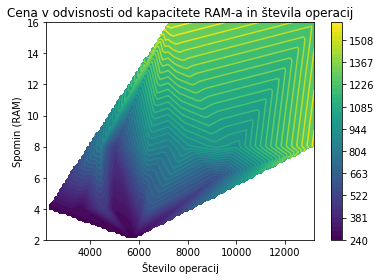

In [102]:
# Contour plot za RAM in st oparacij

N = 100

x = prenosniki['Stevilo operacij']
y = prenosniki['Spomin (RAM)']
z = prenosniki['Cena']

xi = np.linspace(min(x), max(x), N)
yi = np.linspace(min(y), max(y), N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method = 'linear')
     
fig = plt.figure()

CS = plt.contour(xi, yi, zi, levels = np.arange(min(z), max(z), (max(z) - min(z))/50.0),zorder=1)
CS = plt.contourf(xi, yi, zi, levels = np.arange(min(z), max(z), (max(z) - min(z))/50.0),zorder=0)

plt.colorbar(CS)
plt.xlabel('Število operacij')
plt.ylabel('Spomin (RAM)')
plt.title('Cena v odvisnosti od kapacitete RAM-a in števila operacij')
plt.show()

Zgornje ugotovitve povzamem še v enem grafu, kjer barva na grafu prikazuje ceno prenosnika.
Iz grafa je razvidno, da so te specifikacije med seboj tesno povezane. <br> Ugotovila sem, da kapaciteta RAM-a in število operacij močno vplivata na ceno prenosnika.

### Analiza procesorjev

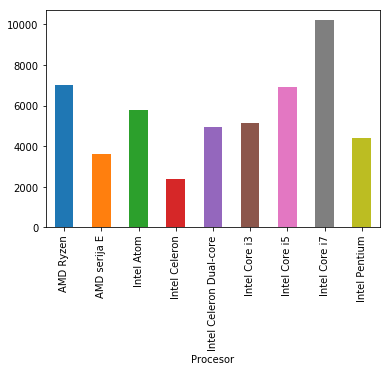

In [103]:
prenosniki_po_procesorju['Stevilo operacij'].mean().plot.bar()

Zgornji graf prikazuje koliko operacij povprečno opravi prenosnik z določenim procesorjem. To je dober pokazatelj, kateri procesor je boljši. Iz grafa je razvidno, da je Intel Core i7 najboljši procesor, Intel Celeron pa najslabši.

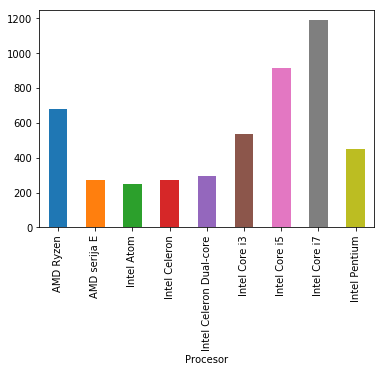

In [104]:
prenosniki_po_procesorju['Cena'].mean().plot.bar()

Zgornji graf prikazuje povprečno ceno prenosnikov glede na procesor. Opazila sem, da je cena približno taka, kot bi jo pričakovala iz enega grafa prej, ne pa povsem. Izstopata procesorja Intel Atom in Intel Celeron Dual-core, ki naj bi se najbolj splačala glede na ceno in sposobnost.

### Analiza spominskega medija

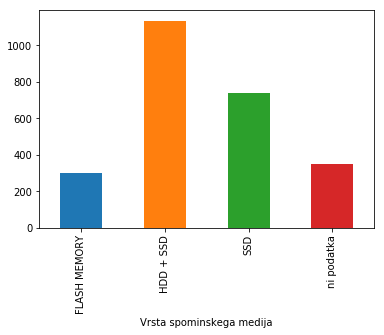

In [105]:
prenosniki_po_spominskem_mediju['Cena'].mean().plot.bar()

Text(0.5,1,'Cena normirana z log2 KTD v odvisnosti od vrste spominskega medija')

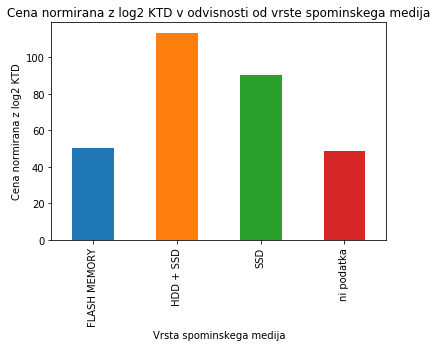

In [106]:
prenosniki_po_spominskem_mediju['Cena normirana z log2 KTD'].mean().plot.bar()
plt.ylabel('Cena normirana z log2 KTD')
plt.title('Cena normirana z log2 KTD v odvisnosti od vrste spominskega medija')

### Analiza zaslona

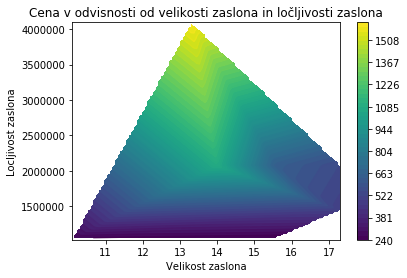

In [107]:
# Contour plot za velikost zaslona, locljivost in ceno

N = 100

x = prenosniki['Velikost zaslona']
y = prenosniki['Locljivost zaslona']
z = prenosniki['Cena']

xi = np.linspace(min(x), max(x), N)
yi = np.linspace(min(y), max(y), N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method = 'linear')
     
fig = plt.figure()

CS = plt.contour(xi, yi, zi, levels = np.arange(min(z), max(z), (max(z) - min(z))/50.0),zorder=1)
CS = plt.contourf(xi, yi, zi, levels = np.arange(min(z), max(z), (max(z) - min(z))/50.0),zorder=0)

plt.colorbar(CS)
plt.xlabel('Velikost zaslona')
plt.ylabel('Locljivost zaslona')
plt.title('Cena v odvisnosti od velikosti zaslona in ločljivosti zaslona')
plt.show()

Iz zgornjega grafa je razvidno, da so najdražji prenosniki tisti, ki imajo najboljšo ločljivost velikosti pa so okoli 13 do 14 INCH.

## Analiza znamk

Text(0,0.5,'povprečna cena')

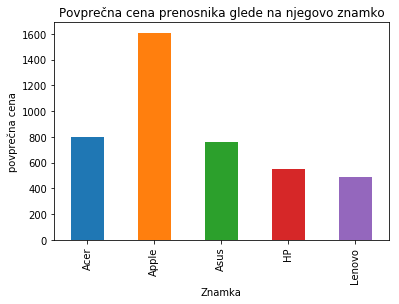

In [108]:
prenosniki_po_znamki['Cena'].mean().plot.bar(title = 'Povprečna cena prenosnika glede na njegovo znamko')
plt.ylabel('povprečna cena')

Na zgornjem histogramu je prikazana povprečna cena prenosnika glede na njegovo znamko. Opazimo, da je znamka Apple dražja od ostalih znamk.

Preverimo, ali je znamka Apple dražja, ker imajo njeni prenosniki boljše lastnosti. Kot ključne indikatorje za boljši (dražji) računalnik izberemo: število operacij, RAM, Procesor, ločljivost zaslona. 

### Povprečno število operacij glede na znamko:

In [109]:
prenosniki_po_znamki['Stevilo operacij'].mean()

Znamka
Acer      7334.545455
Apple     4600.000000
Asus      6485.000000
HP        4450.000000
Lenovo    6400.000000
Name: Stevilo operacij, dtype: float64

### Povprečna kapaciteta RAM-a glede na znamko:

In [110]:
prenosniki_po_znamki['Spomin (RAM)'].mean()

Znamka
Acer      7.545455
Apple     8.000000
Asus      7.250000
HP        6.000000
Lenovo    5.333333
Name: Spomin (RAM), dtype: float64

### Najbolj zastopan procesor glede na znamko:

In [111]:
prenosniki_po_znamki['Procesor'].max()

Znamka
Acer      Intel Pentium
Apple     Intel Core i5
Asus      Intel Pentium
HP        Intel Core i5
Lenovo    Intel Core i5
Name: Procesor, dtype: object

### Velikost prenosnika glede na znamko:

In [116]:
prenosniki_po_znamki['Locljivost zaslona'].mean()

Znamka
Acer      1.950522e+06
Apple     4.096000e+06
Asus      2.073600e+06
HP        1.817472e+06
Lenovo    1.732096e+06
Name: Locljivost zaslona, dtype: float64

# Ugotovitve

In [113]:
prenosniki[(prenosniki.Cena <= 800) & (prenosniki['Spomin (RAM)'] >= 8) & (prenosniki['Stevilo operacij'] >= 6400)]

Ime Znamka   Cena  \
kljuc                                                                    
17     Acer prenosnik Aspire 3 A315-41G-R1MK Ryzen 5 ...   Acer  699.0   
20     Acer prenosnik Aspire 3 A315-53G-50PN i5-8250U...   Acer  535.0   
38     Asus prenosnik S530UN-BQ136 i7-8550U/8GB/SSD25...   Asus  799.0   
42     Asus prenosnik VivoBook 15 X510UF i7-8550U/8GB...   Asus  739.0   

       Velikost zaslona Operacijski sistem  Kapaciteta trdega diska  \
kljuc                                                                 
17                 15.6    Windows 10 Home                      256   
20                 15.6              Linux                      512   
38                 15.6         Endless OS                      256   
42                 15.6         Endless OS                     1000   

       Spomin (RAM)       Procesor  Locljivost zaslona  \
kljuc                                                    
17                8      AMD Ryzen             2073600   
20                8  Intel Core i5             2073600   
38                8  Intel Core i7             2073600   
42                8  Intel Core i7             2073600   

      Vrsta spominskega medija  Frekvenca  Stevilo jeder procesorja  \
kljuc                                                                 
17                         SSD       2000                         4   
20                         SSD       1600                         4   
38                         SSD       1800                         4   
42                   HDD + SSD       1800                         4   

       Stevilo operacij  Log2 KTD  Cena normirana z log2 KTD  
kljuc                                                         
17                 8000       8.0                       87.0  
20                 6400       9.0                       59.0  
38                 7200       8.0                      100.0  
42                 7200      10.0                       74.0

Po zgornjih ugotovitvah, bi se od obravnavanih prenosnikov najbolj splačalo kupiti prenosnik: Asus prenosnik VivoBook 15 X510UF i7-8550U/8GB